# 이항 분류(binary classification)

# 비만이 유전 및 환경, 모두의 탓이라는 것을 증명
- 생존하기 위해 영양분을 체내에 저장하는 뛰어난 능력을 물려받은 인디언들이 미국의 기름진 패스트푸드 문화를 만나

In [6]:
# from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import Dense
# import numpy as np 
# import tensorflow as tf
import pandas as pd

In [8]:
df = pd.read_csv('../dataset/pima-indians-diabetes.csv',  
                names = ["pregnant", "plasma", "pressure", "thickness", 
                         "insulin", "BMI", "pedigree", "age", "class"])

In [9]:
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


샘플 수: 768

속성: 8

- 정보 1 (pregnant): 과거 임신 횟수

- 정보 2 (plasma): 포도당 부하 검사 2시간 후 공복 혈당 농도(mm Hg)

- 정보 3 (pressure): 확장기 혈압(mm Hg)

- 정보 4 (thickness): 삼두근 피부 주름 두께(mm)

- 정보 5 (insulin): 혈청 인슐린(2-hour, mu U/ml)

- 정보 6 (BMI): 체질량 지수(BMI, weight in kg/(height in m)2)

- 정보 7 (pedigree): 당뇨병 가족력

- 정보 8 (age): 나이

클래스: 당뇨(1), 당뇨 아님(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [24]:
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).
      mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
plt.figure(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

In [25]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)

<AxesSubplot:>

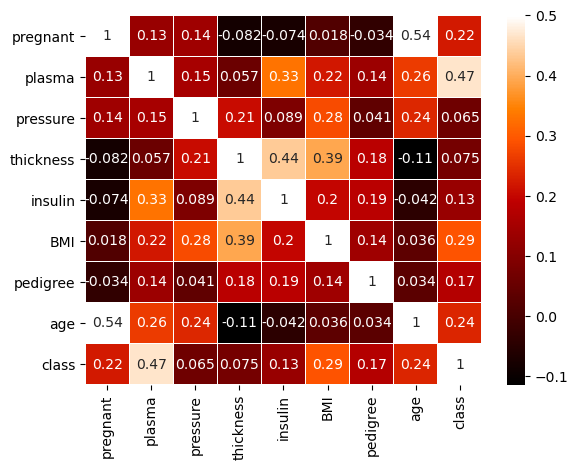

In [26]:
plt.show()

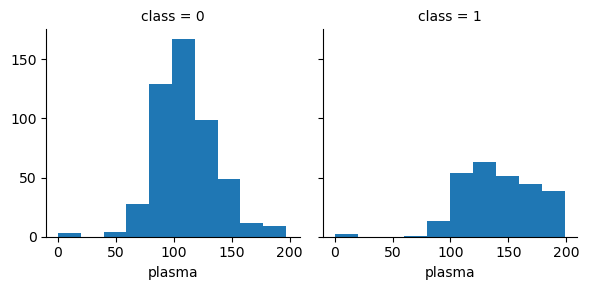

In [21]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf
  
# seed 값 생성
np.random.seed(3)
tf.random.set_seed(3)
  
# 데이터 로드
dataset = numpy.loadtxt("../dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
  
# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
  
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 0s 603us/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 584us/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 558us/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 546us/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 571us/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 597us/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 571us/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 571us/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 597us/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 623us/step - loss: 0.6656 - accur

In [28]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))
model.add(Dense(1, activation='sigmoid'))

24/24 [==============================] - 0s 583us/step - loss: 0.4587 - accuracy: 0.7708

 Accuracy: 0.7708


In [ ]:
# 예측 정확도 : 77.08%

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________
